![](https://9to5google.com/wp-content/uploads/sites/4/2022/10/photo-unblur-header-1.jpg?quality=82&strip=all)

In [1]:
! git clone https://github.com/VITA-Group/DeblurGANv2

Cloning into 'DeblurGANv2'...
remote: Enumerating objects: 902, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 902 (delta 38), reused 60 (delta 31), pack-reused 817
Receiving objects: 100% (902/902), 66.05 MiB | 34.90 MiB/s, done.
Resolving deltas: 100% (465/465), done.


In [9]:
!cd  ./DeblurGANv2

In [14]:
! pip install -r ./DeblurGANv2/requirements.txt 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 703.6 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 25.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=a5286336feeae70fb01485c7181b8f7b45839eec861f0e382e7253e7ffee1425
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=770d13a61313380dc869e68bab594eca29fa39397468736d905c038e81c3d90b
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
 

In [36]:
!cd DeblurGANv2/

In [39]:
import os
 
# Function to Get the current
# working directory
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
 
 
# Driver's code
# Printing CWD before
current_path()
 
# Changing the CWD
os.chdir('./DeblurGANv2')
 
# Printing CWD after
current_path()

Current working directory before
/kaggle/working

Current working directory before
/kaggle/working/DeblurGANv2



In [42]:
!ls

LICENSE			dataset.py	     schedulers.py	test_img
README.md		doc_images	     submit		test_metrics.py
__pycache__		metric_counter.py    test.py		train.py
adversarial_trainer.py	models		     test.sh		util
aug.py			picture_to_video.py  test_aug.py
blurry-image.jpg	predict.py	     test_batchsize.py
config			requirements.txt     test_dataset.py


## Input Blurry Image

In [102]:
!wget -O blurred-image.jpeg https://github.com/amrrs/madebygoogle22-transcript/raw/main/blurred-image.jpeg

--2022-10-10 16:11:00--  https://github.com/amrrs/madebygoogle22-transcript/raw/main/blurred-image.jpeg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/amrrs/madebygoogle22-transcript/main/blurred-image.jpeg [following]
--2022-10-10 16:11:01--  https://raw.githubusercontent.com/amrrs/madebygoogle22-transcript/main/blurred-image.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120674 (118K) [image/jpeg]
Saving to: ‘blurred-image.jpeg’

blurred-image.jpeg  100%[===================>] 117.85K  --.-KB/s    in 0.01s   

2022-10-10 16:11:01 (9.15 MB/s) - ‘blurred-image.jpeg’ saved [120674/120674]



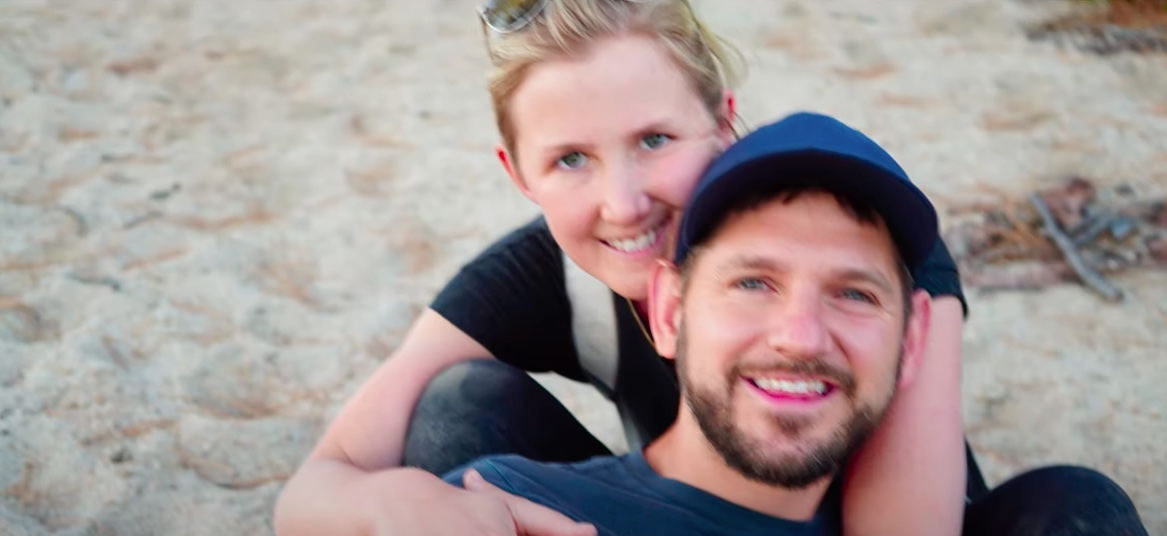

In [103]:
from IPython.display import Image
Image(filename='blurred-image.jpeg') 

In [53]:
!ls 

LICENSE			dataset.py	     schedulers.py	test_img
README.md		doc_images	     submit		test_metrics.py
__pycache__		metric_counter.py    test.py		train.py
adversarial_trainer.py	models		     test.sh		util
aug.py			picture_to_video.py  test_aug.py
blurry-image.jpg	predict.py	     test_batchsize.py
config			requirements.txt     test_dataset.py


In [60]:
!wget -O fpn_inception.h5 'https://docs.google.com/uc?export=download&id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&confirm=t' #https://drive.google.com/open?id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&authuser=0

--2022-10-10 15:10:08--  https://docs.google.com/uc?export=download&id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&confirm=t
Resolving docs.google.com (docs.google.com)... 172.217.203.139, 172.217.203.138, 172.217.203.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c0pq39mqqlb21qfkhmn7mvgqr7f8qdh1/1665414600000/12426322494373766467/*/1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR?e=download&uuid=4e4b5d5e-b36b-43d6-ad04-c6ebc47e1098 [following]
--2022-10-10 15:10:09--  https://doc-10-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c0pq39mqqlb21qfkhmn7mvgqr7f8qdh1/1665414600000/12426322494373766467/*/1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR?e=download&uuid=4e4b5d5e-b36b-43d6-ad04-c6ebc47e1098
Resolving doc-10-54-docs.googleusercontent.com (doc-10-54-docs.googleusercontent.com)... 173.194.213.

In [61]:
!ls

 LICENSE
 README.md
 __pycache__
 adversarial_trainer.py
 aug.py
 blurry-image.jpg
 config
 dataset.py
 doc_images
 fpn_inception.h5
 metric_counter.py
 models
 picture_to_video.py
 predict.py
 requirements.txt
 schedulers.py
 submit
 test.py
 test.sh
 test_aug.py
 test_batchsize.py
 test_dataset.py
 test_img
 test_metrics.py
 train.py
'uc?export=download&id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&confirm=t'
 util


In [62]:
! python predict.py blurry-image.jpg

In [63]:
!ls submit/

000001.png  000019.png	000201.png


import os
from glob import glob
from typing import Optional

import cv2
import numpy as np
import torch
import yaml
from fire import Fire
from tqdm import tqdm

from aug import get_normalize
from models.networks import get_generator


class Predictor:
    def __init__(self, weights_path: str, model_name: str = ''):
        with open('config/config.yaml',encoding='utf-8') as cfg:
            config = yaml.load(cfg, Loader=yaml.FullLoader)
        model = get_generator(model_name or config['model'])
        model.load_state_dict(torch.load(weights_path)['model'])
        self.model = model.cuda()
        self.model.train(True)
        # GAN inference should be in train mode to use actual stats in norm layers,
        # it's not a bug
        self.normalize_fn = get_normalize()

    @staticmethod
    def _array_to_batch(x):
        x = np.transpose(x, (2, 0, 1))
        x = np.expand_dims(x, 0)
        return torch.from_numpy(x)

    def _preprocess(self, x: np.ndarray, mask: Optional[np.

In [83]:
%%writefile predict1.py

import os
from glob import glob
from typing import Optional

import cv2
import numpy as np
import torch
import yaml
from fire import Fire
from tqdm import tqdm

from aug import get_normalize
from models.networks import get_generator


class Predictor:
    def __init__(self, weights_path: str, model_name: str = ''):
        with open('config/config.yaml',encoding='utf-8') as cfg:
            config = yaml.load(cfg, Loader=yaml.FullLoader)
        model = get_generator(model_name or config['model'])
        model.load_state_dict(torch.load(weights_path)['model'])
        self.model = model.cuda()
        self.model.train(True)
        # GAN inference should be in train mode to use actual stats in norm layers,
        # it's not a bug
        self.normalize_fn = get_normalize()

    @staticmethod
    def _array_to_batch(x):
        x = np.transpose(x, (2, 0, 1))
        x = np.expand_dims(x, 0)
        return torch.from_numpy(x)

    def _preprocess(self, x: np.ndarray, mask: Optional[np.ndarray]):
        x, _ = self.normalize_fn(x, x)
        if mask is None:
            mask = np.ones_like(x, dtype=np.float32)
        else:
            mask = np.round(mask.astype('float32') / 255)

        h, w, _ = x.shape
        block_size = 32
        min_height = (h // block_size + 1) * block_size
        min_width = (w // block_size + 1) * block_size

        pad_params = {'mode': 'constant',
                      'constant_values': 0,
                      'pad_width': ((0, min_height - h), (0, min_width - w), (0, 0))
                      }
        x = np.pad(x, **pad_params)
        mask = np.pad(mask, **pad_params)

        return map(self._array_to_batch, (x, mask)), h, w

    @staticmethod
    def _postprocess(x: torch.Tensor) -> np.ndarray:
        x, = x
        x = x.detach().cpu().float().numpy()
        x = (np.transpose(x, (1, 2, 0)) + 1) / 2.0 * 255.0
        return x.astype('uint8')

    def __call__(self, img: np.ndarray, mask: Optional[np.ndarray], ignore_mask=True) -> np.ndarray:
        (img, mask), h, w = self._preprocess(img, mask)
        with torch.no_grad():
            inputs = [img.cuda()]
            if not ignore_mask:
                inputs += [mask]
            pred = self.model(*inputs)
        return self._postprocess(pred)[:h, :w, :]

def process_video(pairs, predictor, output_dir):
    for video_filepath, mask in tqdm(pairs):
        video_filename = os.path.basename(video_filepath)
        output_filepath = os.path.join(output_dir, os.path.splitext(video_filename)[0]+'_deblur.mp4')
        video_in = cv2.VideoCapture(video_filepath)
        fps = video_in.get(cv2.CAP_PROP_FPS)
        width = int(video_in.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(video_in.get(cv2.CAP_PROP_FRAME_HEIGHT))
        total_frame_num = int(video_in.get(cv2.CAP_PROP_FRAME_COUNT))
        video_out = cv2.VideoWriter(output_filepath, cv2.VideoWriter_fourcc(*'MP4V'), fps, (width, height))
        tqdm.write(f'process {video_filepath} to {output_filepath}, {fps}fps, resolution: {width}x{height}')
        for frame_num in tqdm(range(total_frame_num), desc=video_filename):
            res, img = video_in.read()
            if not res:
                break
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            pred = predictor(img, mask)
            pred = cv2.cvtColor(pred, cv2.COLOR_RGB2BGR)
            video_out.write(pred)

def main(img_pattern: str,
         mask_pattern: Optional[str] = None,
         weights_path='fpn_inception.h5',
         out_dir='submit/',
         side_by_side: bool = False,
         video: bool = False):
    def sorted_glob(pattern):
        return sorted(glob(pattern))

    imgs = sorted_glob(img_pattern)
    masks = sorted_glob(mask_pattern) if mask_pattern is not None else [None for _ in imgs]
    pairs = zip(imgs, masks)
    names = sorted([os.path.basename(x) for x in glob(img_pattern)])
    predictor = Predictor(weights_path=weights_path)

    os.makedirs(out_dir, exist_ok=True)
    if not video:
        for name, pair in tqdm(zip(names, pairs), total=len(names)):
            f_img, f_mask = pair
            img, mask = map(cv2.imread, (f_img, f_mask))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            pred = predictor(img, mask)
            if side_by_side:
                pred = np.hstack((img, pred))
            pred = cv2.cvtColor(pred, cv2.COLOR_RGB2BGR)
            cv2.imwrite(os.path.join(out_dir, name),
                        pred)
    else:
        process_video(pairs, predictor, out_dir)

# def getfiles():
#     filenames = os.listdir(r'.\dataset1\blur')
#     print(filenames)
def get_files():
    list=[]
    for filepath,dirnames,filenames in os.walk(r'.\dataset1\blur'):
        for filename in filenames:
            list.append(os.path.join(filepath,filename))
    return list





if __name__ == '__main__':
  #  Fire(main)
#增加批量处理图片：
#     img_path=get_files()
#     for i in img_path:
#         main(i)
    main('blurred-image.jpeg')

Overwriting predict1.py


In [68]:
!ls

 LICENSE
 README.md
 __pycache__
 adversarial_trainer.py
 aug.py
 blurry-image.jpg
 config
 dataset.py
 doc_images
 fpn_inception.h5
 metric_counter.py
 models
 picture_to_video.py
 predict.py
 predict1.py
 requirements.txt
 schedulers.py
 submit
 test.py
 test.sh
 test_aug.py
 test_batchsize.py
 test_dataset.py
 test_img
 test_metrics.py
 train.py
'uc?export=download&id=1UXcsRVW-6KF23_TNzxw-xC0SzaMfXOaR&confirm=t'
 util


In [74]:
!wget -O inceptionresnetv2-520b38e4.pth http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth --no-check-certificate

--2022-10-10 15:18:28--  http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth
Resolving data.lip6.fr (data.lip6.fr)... 132.227.201.10
Connecting to data.lip6.fr (data.lip6.fr)|132.227.201.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth [following]
--2022-10-10 15:18:28--  https://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth
Connecting to data.lip6.fr (data.lip6.fr)|132.227.201.10|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 223774246 (213M) [application/octet-stream]
Saving to: ‘inceptionresnetv2-520b38e4.pth’

inceptionresnetv2-5 100%[===================>] 213.41M   362KB/s    in 10m 29s 

2022-10-10 15:28:57 (348 KB/s) - ‘inceptionresnetv2-520b38e4.pth’ saved [223774246/223774246]



In [77]:
! cp inceptionresnetv2-520b38e4.pth /root/.cache/torch/hub/checkpoints/

In [104]:
! python predict1.py blurred-image.jpeg

  0%|                                                     | 0/1 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.11it/s]


In [87]:
!ls submit/

000001.png  000019.png	000201.png  blurred-image.jpeg	blurry-image.jpg


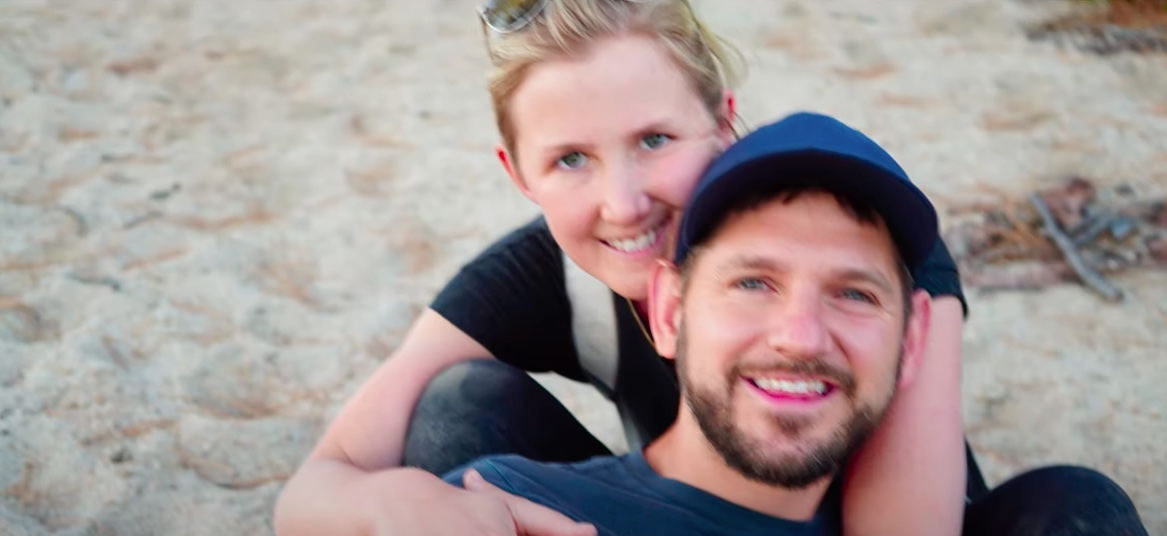

In [106]:
from IPython.display import Image
Image(filename='blurred-image.jpeg') 

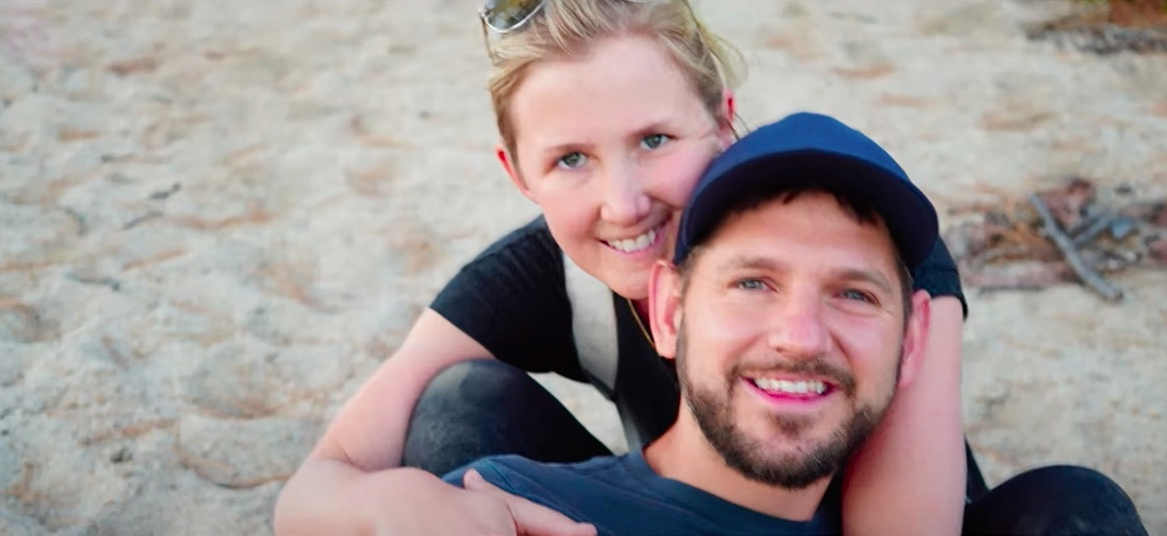

In [105]:
from IPython.display import Image
Image(filename='submit/blurred-image.jpeg') 